In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
#import sklearn.

# 1) Load the dataset

In [7]:
parkinson_df = pd.read_csv('parkinsons_data.csv')

# 2) It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [8]:
parkinson_df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [9]:
print(parkinson_df.shape)
parkinson_df.info()


(195, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non

The likely challenge in the dataset is that the correlation may be high between independent variables.

# 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [10]:
#bivariate analysis
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
parkinson_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [11]:
#Post correlation analysis, after eyeballing, we can drop the following columns that have a heavy correlation with other independent variables
 #MDVP : Jitter(%), MDVP:RAP, Jitter DDP, MDVP(db), Shimmer APQ5, Shimmer DDA.
parkinson_pruned_df = parkinson_df.drop(parkinson_df.columns[[4,6,8,10,12,14]], axis=1)

print(parkinson_df.shape)
print(parkinson_pruned_df.shape)
print(parkinson_pruned_df.info())

(195, 24)
(195, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:PPQ            195 non-null float64
MDVP:Shimmer        195 non-null float64
Shimmer:APQ3        195 non-null float64
MDVP:APQ            195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 27.5+ KB
None


In [12]:
#univariate analysis involves analysis of mean, median, mode and spread and skewness
parkinson_pruned_df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:Shimmer,Shimmer:APQ3,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.000044,0.003446,0.029709,0.015664,0.024081,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.000035,0.002759,0.018857,0.010153,0.016947,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.000007,0.000920,0.009540,0.004550,0.007190,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.000020,0.001860,0.016505,0.008245,0.013080,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.000030,0.002690,0.022970,0.012790,0.018260,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.000060,0.003955,0.037885,0.020265,0.029400,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.000260,0.019580,0.119080,0.056470,0.137780,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(Abs)    10.869043
MDVP:PPQ            11.963922
MDVP:Shimmer         3.238308
Shimmer:APQ3         2.720152
MDVP:APQ            11.163288
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64


MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(Abs)    2.649071
MDVP:PPQ            3.073892
MDVP:Shimmer        1.666480
Shimmer:APQ3        1.580576
MDVP:APQ            2.618047
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

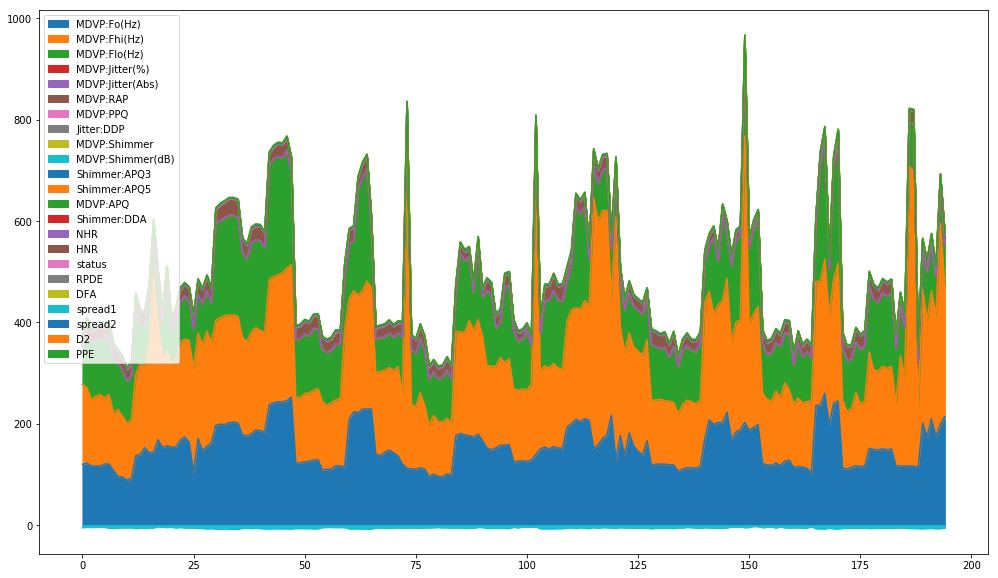

In [13]:
#or we can use skewness and kurtosis to figure out tail info
plt.figure(figsize=(17, 10))

parkinson_df.plot.area(figsize=(17, 10))
print(parkinson_pruned_df.kurtosis(numeric_only  = True))
parkinson_pruned_df.skew(numeric_only  = True)



#Parkin_df.skew() , Parkin_df.kurtosis()


# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [14]:

X = parkinson_pruned_df.drop(parkinson_pruned_df.columns[[0,11]], axis=1) #drop the 0th and 11th column.
Y = parkinson_pruned_df.status
test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for repeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.5, random_state=seed)

# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [16]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, Y_train)
#feature importance
index_name = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(Abs)','MDVP:PPQ','MDVP:Shimmer','Shimmer:APQ3','MDVP:APQ','NHR','HNR','RPDE','DFA', 'spread1','spread2','d2','PPE']
pd.DataFrame(dt_model.feature_importances_, index = index_name)

,0
MDVP:Fo(Hz),0.041782
MDVP:Fhi(Hz),0.232716
MDVP:Flo(Hz),0.105404
MDVP:Jitter(Abs),0.000000
MDVP:PPQ,0.000000
MDVP:Shimmer,0.067794
Shimmer:APQ3,0.056196
MDVP:APQ,0.000000
NHR,0.000000
HNR,0.000000


In [17]:
train_char_label = ['No','Yes']

In [18]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_Tree_File = open('parkinson_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= Parkinson_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Parkinson_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

#print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))

# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.

**Crosstab**

In [19]:
print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_val , Y_val))

#confusion matrix
Y_predict = dt_model.predict(X_val)
print(Y_predict)
print(metrics.confusion_matrix(Y_val, Y_predict))

1.0
0.8676470588235294
[1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
[[12  7]
 [ 2 47]]


In [20]:
Y_predict = dt_model.predict(X_test)
print(dt_model.score(X_test, Y_test))
print(metrics.confusion_matrix(Y_test, Y_predict))

0.8983050847457628
[[11  5]
 [ 1 42]]


# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [49]:
max_depths = np.linspace(1, 32,32,endpoint = True)
train_results = []
test_result = []
overall_score = []
for i in max_depths:
    dt_model = DecisionTreeClassifier(max_depth = i, criterion ='entropy')
    dt_model.fit(X_train,Y_train)
    
    train_predict = dt_model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_predict = dt_model.predict(X_test)
    model_score = dt_model.score(X_test, Y_test)
    overall_score.append(model_score)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, test_predict)
    
    roc_auc = auc(false_positive_rate,true_positive_rate)

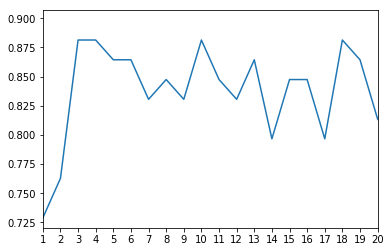

In [50]:
plt.plot(max_depths, overall_score)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlim([1, 20])
plt.show()

In [55]:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
train_results = []
test_result = []
overall_score = []
for i in min_samples_leaf:
    dt_model = DecisionTreeClassifier(min_samples_leaf = i, criterion='entropy')
    dt_model.fit(X_train,Y_train)
    
    train_predict = dt_model.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_predict = dt_model.predict(X_test)
    model_score = dt_model.score(X_test, Y_test)
    overall_score.append(model_score)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, test_predict)
    
    roc_auc = auc(false_positive_rate,true_positive_rate)

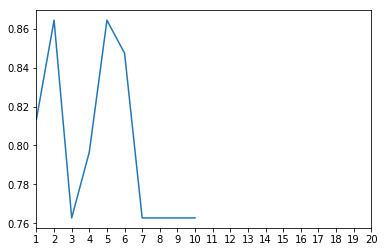

In [56]:
plt.plot(min_samples_leaf, overall_score)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlim([1, 20])
plt.show()

**Looking at the graphs we can conclude that for test data we see that max_depth of 4 gives highest accuracy and min_samples_leaf could be 2 or 5. So we regularize the model to max_depth =4 and min_leaves at 2**

In [46]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2, random_state=20)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [47]:
print(dt_model.score(X_train, Y_train))
print(dt_model.score(X_val, Y_val))

#confusion matrix
Y_predict = dt_model.predict(X_val)
print(Y_predict)
print(metrics.confusion_matrix(Y_val, Y_predict))

0.9558823529411765
0.7941176470588235
[0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1]
[[12  7]
 [ 7 42]]


In [48]:
Y_predict = dt_model.predict(X_test)
print(dt_model.score(X_test, Y_test))
print(metrics.confusion_matrix(Y_test, Y_predict))

0.864406779661017
[[11  5]
 [ 3 40]]


**Regularisation helps in getting better accuracy. Also it helps in overfitting problem.**

# 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [486]:
estimators= np.arange(1,50)
rf_test_acc_score = []
for i in estimators:
    dt_model = RandomForestClassifier(n_estimators = i, random_state = 10)
    dt_model.fit(X_train, Y_train)
    rf_test_acc_score.append(dt_model.score(X_test, Y_test))
print(rf_test_acc_score)

[0.864406779661017, 0.8813559322033898, 0.9152542372881356, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8813559322033898, 0.8813559322033898, 0.864406779661017, 0.8983050847457628, 0.8813559322033898, 0.8813559322033898, 0.8983050847457628, 0.9152542372881356, 0.9152542372881356, 0.9152542372881356, 0.9152542372881356, 0.9152542372881356, 0.8983050847457628, 0.9152542372881356, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8813559322033898, 0.8983050847457628, 0.8983050847457628, 0.8813559322033898, 0.8983050847457628, 0.8983050847457628, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8813559322033898, 0.8983050847457628, 0.9152542372881356, 0.9152542372881356, 0.8983050847457628, 0.9152542372881356, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8983050847457628, 0.8813559322033898, 0.8983050847457628]


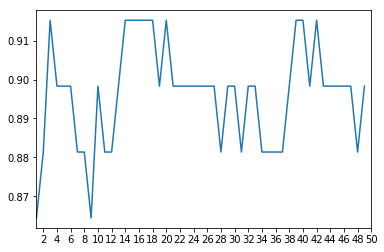

In [487]:
plt.plot(estimators, rf_test_acc_score)
plt.xticks([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50])
plt.xlim([1, 50])
plt.show()

In [481]:
rfcl = RandomForestClassifier(n_estimators = 15, random_state = 10)
rfcl = rfcl.fit(X_train, Y_train)

In [482]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , Y_test))
print(metrics.confusion_matrix(Y_test, y_predict))

0.9152542372881356
[[12  4]
 [ 1 42]]


* The highest value of accuracy is 91.5% and as per graph, the test set gives the highest accuracy at some points like, 4 trees, 15 trees, 20 trees etc.  RF reduces the false negetives and hence imporves the accuracy of the results.*